In [254]:
import pandas as pd
import glob
from datetime import datetime
import numpy as np

# 한국의 공휴일, version : 1.1.1
from workalendar.asia import SouthKorea 

holidays = pd.concat([pd.Series(np.array(SouthKorea().holidays(2018))[:, 0]), pd.Series(np.array(SouthKorea().holidays(2017))[:, 0])]).reset_index(drop=True)

In [2]:
# 2017년 ~ 2018년 data 취합

path_list = [r'data/경진대회_나주시_전력사용량 DATA1', r'data/경진대회_나주시_전력사용량 DATA2', r'data/경진대회_나주시_전력사용량 DATA3']

li = []
for path in path_list:
    all_files = glob.glob(path + "/*.csv")
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0, encoding='euc-kr')
        li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

/usr/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
frame.head()

,날짜,시간,시/도,시/군/구,읍/면/동,고객(가칭),계약종별,계약전력,유효전력,지상무효전력,진상무효전력
0,20170901,15,전라남도,나주시,AA11동,AA279호,일반용(갑)저압,10,0.522,0.417,0
1,20170901,15,전라남도,나주시,AA1동,AA278호,일반용(갑)저압,5,0.014,0,0
2,20170901,15,전라남도,나주시,AA10동,AA328호,일반용(갑)저압,5,0.167,0.087,0
3,20170901,30,전라남도,나주시,AA11동,AA279호,일반용(갑)저압,10,0.370,0.371,0
4,20170901,30,전라남도,나주시,AA1동,AA278호,일반용(갑)저압,5,0.025,0,0


In [4]:
frame.tail()

,날짜,시간,시/도,시/군/구,읍/면/동,고객(가칭),계약종별,계약전력,유효전력,지상무효전력,진상무효전력
67769093,20180930,1704,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,NaN,NaN,NaN
67769094,20180930,1715,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0
67769095,20180930,1800,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0
67769096,20180930,1808,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,NaN,NaN,NaN
67769097,20180930,2200,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0


In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67769098 entries, 0 to 67769097
Data columns (total 11 columns):
날짜        int64
시간        int64
시/도       object
시/군/구     object
읍/면/동     object
고객(가칭)    object
계약종별      object
계약전력      int64
유효전력      float64
지상무효전력    object
진상무효전력    object
dtypes: float64(1), int64(3), object(7)
memory usage: 5.6+ GB


In [6]:
frame['날짜'] = pd.to_datetime(frame['날짜'], format="%Y%m%d")
frame['시간'] = frame['시간'].astype(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67769098 entries, 0 to 67769097
Data columns (total 11 columns):
날짜        datetime64[ns]
시간        object
시/도       object
시/군/구     object
읍/면/동     object
고객(가칭)    object
계약종별      object
계약전력      int64
유효전력      float64
지상무효전력    object
진상무효전력    object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 5.6+ GB


## 전처리
---

### 1. datetime으로 변환

#### **Issue** 

- 날짜 : `20170228`
- 시간 : `2400`

> `20170301`+ `0000` 으로 변경하고 이를 `format = datetime64[ns]`으로 `datetime`이라는 새로운 column 생성 

In [8]:
frame.loc[frame['시간'] == '2400', '날짜'] = frame['날짜'] + pd.DateOffset(days=1)
frame['시간'] = frame['시간'].apply(lambda x : '0000' if '2400' in str(x) else str(x).zfill(4))
frame['datetime'] = pd.to_datetime(frame['날짜'].astype(str) + ' ' + frame['시간'].apply(lambda x: x[0:2]) + ':' + frame['시간'].apply(lambda x: x[2:]))

In [9]:
frame.tail()

,날짜,시간,시/도,시/군/구,읍/면/동,고객(가칭),계약종별,계약전력,유효전력,지상무효전력,진상무효전력,datetime
67769093,2018-09-30,1704,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,NaN,NaN,NaN,2018-09-30 17:04:00
67769094,2018-09-30,1715,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0,2018-09-30 17:15:00
67769095,2018-09-30,1800,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0,2018-09-30 18:00:00
67769096,2018-09-30,1808,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,NaN,NaN,NaN,2018-09-30 18:08:00
67769097,2018-09-30,2200,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0,2018-09-30 22:00:00


In [10]:
frame = frame.sort_values(by = 'datetime')

### 2. 고객 분류 I

#### **Issue** 

- 읍/면/동 : 비식별화
- 고객(가정) :  비식별화

> `읍/면/동` + `고객(가정)` 을 **하나의 user**로 봐야하기 때문에, 이를 고려한 새로운 **`user`**라는 새로운 column 생성


In [13]:
frame[frame['고객(가칭)'] == 'AA1370호']['읍/면/동'].value_counts()

AA104동    2947
AA102동    2895
AA111동    2851
AA58동     2768
AA120동    2471
AA126동    2253
AA48동     1805
Name: 읍/면/동, dtype: int64

In [14]:
frame['user'] = frame['읍/면/동'] + ' ' + frame['고객(가칭)']

> `계약종별`로도 `user`가 겹치는 경우 발생하는데 이는 계약종별로 dataframe을 **고객 분류 II**에서 처리
>
> 아래를 보면 행의 갯수 차이를 보아 몇몇 user가 계약종별로 겹치는 것으로 짐작됨

In [ ]:
AA10동 AA293호

In [22]:
frame.groupby(['user', '계약종별']).count()

,,날짜,시간,시/도,시/군/구,읍/면/동,고객(가칭),계약전력,유효전력,지상무효전력,진상무효전력,datetime
user,계약종별,,,,,,,,,,,
AA100동 AA1517호,주택용전력,181,181,181,181,181,181,181,174,174,174,181
AA100동 AA1540호,주택용전력,2188,2188,2188,2188,2188,2188,2188,2065,2065,2065,2188
AA100동 AA1664호,주택용전력,2472,2472,2472,2472,2472,2472,2472,2275,2275,2275,2472
AA100동 AA1685호,주택용전력,2497,2497,2497,2497,2497,2497,2497,2419,2419,2419,2497
AA100동 AA1695호,주택용전력,2817,2817,2817,2817,2817,2817,2817,2750,2750,2750,2817
AA100동 AA1705호,주택용전력,2700,2700,2700,2700,2700,2700,2700,2638,2638,2638,2700
AA100동 AA307호,주택용전력,2367,2367,2367,2367,2367,2367,2367,2214,2214,2214,2367
AA100동 AA314호,주택용전력,2462,2462,2462,2462,2462,2462,2462,2381,2381,2381,2462
AA100동 AA321호,주택용전력,2706,2706,2706,2706,2706,2706,2706,2644,2644,2644,2706


In [24]:
len(frame['user'].value_counts())

19828

### 3. 필요한 Column 설정

1. **영어로 통일 필요**
    - `계약종별` =  `contract_type`
    - `유효전력` =  `active_power`  
    
    
2. **필요한 컬럼 협의 필요**
    - `datetime`
    - `user`
    - `contract_type`
    - `active_power`

In [28]:
frame.rename(columns = {'계약종별' : 'contract_type', '유효전력' : 'active_power'}, inplace = True)
column_list = ['datetime', 'user', 'contract_type', 'active_power']

In [29]:
new_frame = frame[column_list]

In [32]:
new_frame.head()

,datetime,user,contract_type,active_power
16436859,2017-01-01 00:15:00,AA4동 AA95호,주택용전력,0.005
16436610,2017-01-01 00:15:00,AA4동 AA53호,주택용전력,NaN
16436609,2017-01-01 00:15:00,AA3동 AA52호,일반용(갑)저압,NaN
16436608,2017-01-01 00:15:00,AA3동 AA51호,주택용전력,NaN
16436607,2017-01-01 00:15:00,AA3동 AA43호,주택용전력,NaN


In [33]:
new_frame.tail()

,datetime,user,contract_type,active_power
62064657,2018-12-28 02:15:00,AA128동 AA661호,주택용전력,NaN
62064656,2018-12-28 02:15:00,AA128동 AA660호,주택용전력,NaN
62064655,2018-12-28 02:15:00,AA127동 AA655호,주택용전력,NaN
62064653,2018-12-28 02:15:00,AA113동 AA329호,일반용(갑)저압,NaN
62064660,2018-12-28 02:15:00,AA128동 AA1355호,주택용전력,NaN


### 4. 고객 분류 II

#### 계약종별에 따른 dataframe 분리

> **이유** : 소모하는 전력량 차이 있을것으로 판단, 비식별된 user가 계약종별로 중복되고 있음 발견!  
>
> **참고** : [한글 전기요금표](http://cyber.kepco.co.kr/ckepco/front/jsp/CY/E/E/CYEEHP00102.jsp) 에서 계약종 설명되어 있음
- **df_group_A** : 주택용전력 -> 저압(3kW 이하의 고객) 및 고압으로 구분
- **df_group_B** : 일반용(갑)저압 -> 계약 전력 300kW 미만 고객
- **df_group_C** : 산업용(갑)저압 -> 광업, 제조업 및 기타사업에 전력을 사용하는 계약전력 4kW 이상 300kW 미만의 고객
- **df_group_D** : 심야전력(갑)   -> ...
- **df_group_E** : 농사용(을)저압 -> 계약전력 1,000kW 미만의 고객으로 농사용전력(갑) 이외의 고객
- **df_group_F** : 농사용(갑) -> 양곡생산을 위한 양수, 배수펌프 및 수문조작에 사용하는 전력
- **df_group_G** : 교육용(갑)저압 -> 계약전력 1,000kW 미만의 고객
- **df_group_H** : 가로등(을) -> ...

In [35]:
df_group_A = new_frame[new_frame['contract_type'] == '주택용전력']
df_group_B = new_frame[new_frame['contract_type'] == '일반용(갑)저압']
df_group_C = new_frame[new_frame['contract_type'] == '산업용(갑)저압']
df_group_D = new_frame[new_frame['contract_type'] == '심야전력(갑)']
df_group_E = new_frame[new_frame['contract_type'] == '농사용(을)저압']
df_group_F = new_frame[new_frame['contract_type'] == '교육용(갑)저압']
df_group_G = new_frame[new_frame['contract_type'] == '가로등(을)']

- **점검** : `AA10동 AA293호`가 계약 유형별로 실제로 `주택용전력`, `일반용(갑)저압`, `산업용(갑)저압`, `심야전력(갑)` 에 포함되어 있음 따라서 그룹별로 나눠야지 완전한 식별을 해야한다.

In [40]:
df_group_A[['datetime', 'user', 'active_power']].groupby('user').count().loc['AA10동 AA293호']

datetime        8597
active_power    8597
Name: AA10동 AA293호, dtype: int64

In [41]:
df_group_B[['datetime', 'user', 'active_power']].groupby('user').count().loc['AA10동 AA293호']

datetime        8792
active_power    8792
Name: AA10동 AA293호, dtype: int64

In [42]:
df_group_C[['datetime', 'user', 'active_power']].groupby('user').count().loc['AA10동 AA293호']

datetime        2970
active_power    2970
Name: AA10동 AA293호, dtype: int64

In [43]:
df_group_D[['datetime', 'user', 'active_power']].groupby('user').count().loc['AA10동 AA293호']

datetime        2896
active_power    2850
Name: AA10동 AA293호, dtype: int64

## EDA 

- 결측값 확인
- 목표 : target은 12 hour 이후의 예측
- LSTM 사용하면 학습에 필요한 sequence 고려해야함 (sequence = ?)

user별로 `N/A` 값 분포 확인 필요

In [36]:
df_group_A['user'].value_counts()

AA8동 AA23호        23037
AA3동 AA51호        19864
AA11동 AA244호      14537
AA11동 AA239호      14427
AA11동 AA125호      14367
AA8동 AA75호        14346
AA8동 AA12호        14339
AA8동 AA26호        14338
AA8동 AA33호        14331
AA8동 AA5호         14328
AA13동 AA29호       14145
AA4동 AA160호       14045
AA11동 AA37호       13174
AA8동 AA837호       11694
AA12동 AA385호      11536
AA8동 AA169호       11522
AA7동 AA851호       11418
AA11동 AA86호       11406
AA11동 AA109호      11404
AA10동 AA105호      11403
AA11동 AA82호       11403
AA11동 AA108호      11403
AA3동 AA63호        11400
AA11동 AA72호       11398
AA4동 AA59호        11376
AA11동 AA39호       11362
AA5동 AA605호       11324
AA4동 AA16호        11314
AA11동 AA719호      11248
AA4동 AA159호       11188
                  ...  
AA66동 AA1625호       178
AA65동 AA1434호       169
AA12동 AA327호        167
AA68동 AA1478호       164
AA68동 AA1386호       157
AA99동 AA1408호       152
AA73동 AA1385호       149
AA98동 AA1424호       147
AA104동 AA1199호      145
AA8동 AA776호         140
AA7동 AA599호     

### 그룹별로 결측값이 가장 적은 `상위 10개 user` 시각화

In [70]:
df_group_A[['user', 'datetime', 'active_power']].groupby('user').count().sort_values(by=['active_power'], ascending=False).head(10)

,datetime,active_power
user,,
AA8동 AA23호,23037,23037
AA11동 AA125호,14367,14367
AA8동 AA12호,14339,14339
AA8동 AA26호,14338,14338
AA8동 AA33호,14331,14331
AA8동 AA5호,14328,14328
AA13동 AA29호,14145,14145
AA4동 AA160호,14045,14045
AA3동 AA51호,19864,13482


In [65]:
df_group_A[['user', 'datetime', 'active_power']].groupby('user').count().sort_values(by=['active_power'], ascending=False).index[:10]

Index(['AA8동 AA23호', 'AA11동 AA125호', 'AA8동 AA12호', 'AA8동 AA26호', 'AA8동 AA33호',
       'AA8동 AA5호', 'AA13동 AA29호', 'AA4동 AA160호', 'AA3동 AA51호', 'AA11동 AA37호'],
      dtype='object', name='user')

In [67]:
import matplotlib.pylab as plt

def df_multiple_visualize(df, counts, width, height):
    '''
    Active power visualization function consisting of data frames
    
    # input
    df : dataframe
    counts : 시각화하고 싶은 갯수
    width : figsize width
    height : figsize height
    
    # output
    시간에 따른 유효전력 시각화
    '''
    fig, axs = plt.subplots(counts, figsize=(width, height), constrained_layout=True, sharex=True, sharey=True)
    # fig.suptitle('df_group_A_Top 10 Power')
    lists = list(df[['user', 'datetime', 'active_power']].groupby('user').count().sort_values(by=['active_power'], ascending=False).index[:counts])
    print(lists)
    for i, j in enumerate(lists):
        axs[i].plot(df[df['user'] == j]['datetime'], df[df['user'] == j]['active_power'])
        axs[i].set_title(j)

['AA8동 AA23호', 'AA11동 AA125호', 'AA8동 AA12호', 'AA8동 AA26호', 'AA8동 AA33호', 'AA8동 AA5호', 'AA13동 AA29호', 'AA4동 AA160호', 'AA3동 AA51호', 'AA11동 AA37호', 'AA8동 AA75호', 'AA12동 AA385호', 'AA8동 AA837호', 'AA11동 AA86호', 'AA11동 AA109호']


/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


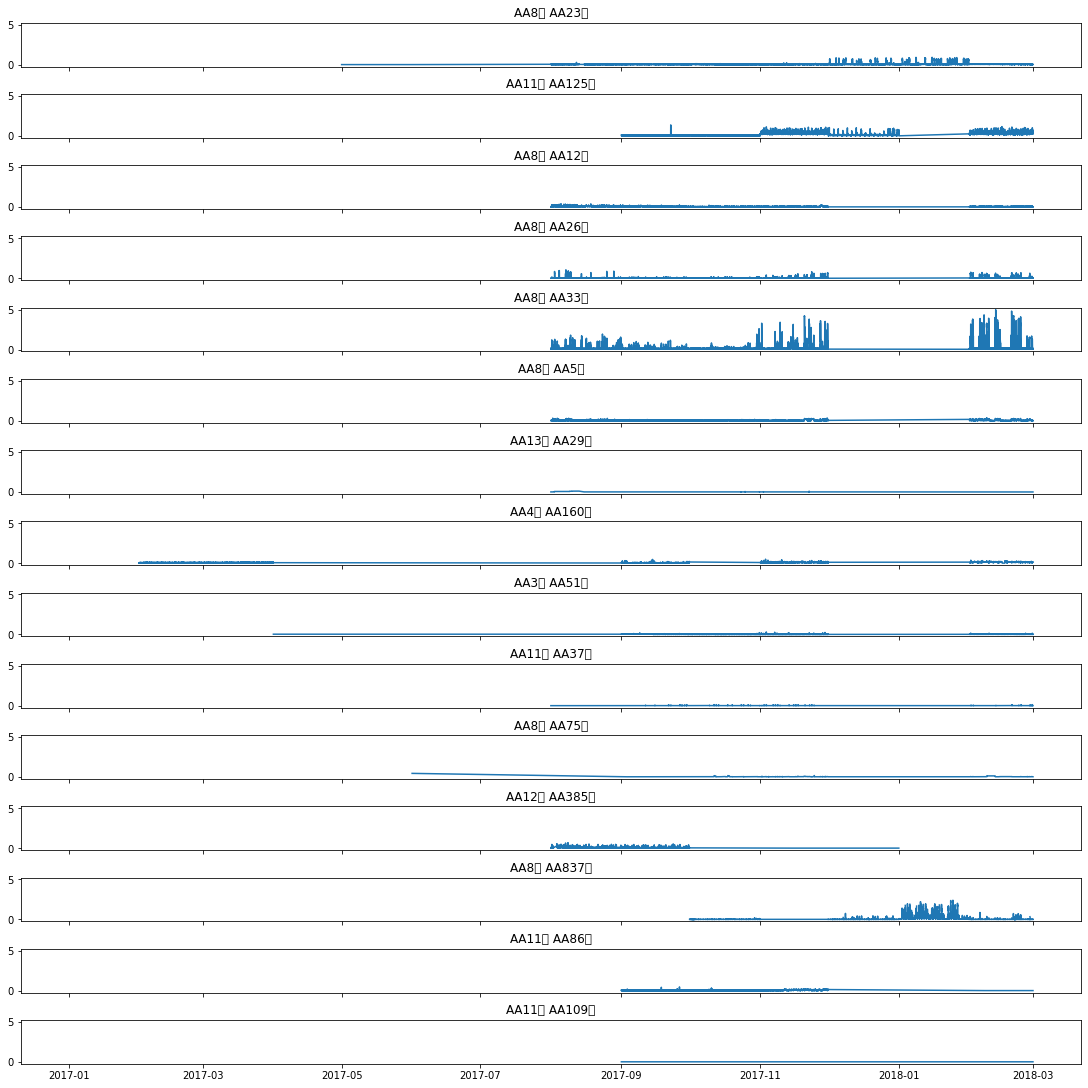

In [68]:
# 주택용전력 시각화
df_multiple_visualize(df_group_A, 15, 15, 15)

['AA8동 AA24호', 'AA8동 AA18호', 'AA8동 AA9호', 'AA8동 AA21호', 'AA5동 AA74호', 'AA8동 AA17호', 'AA8동 AA19호', 'AA8동 AA8호', 'AA11동 AA114호', 'AA8동 AA22호', 'AA5동 AA34호', 'AA8동 AA176호', 'AA11동 AA110호', 'AA7동 AA510호', 'AA11동 AA382호']


/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


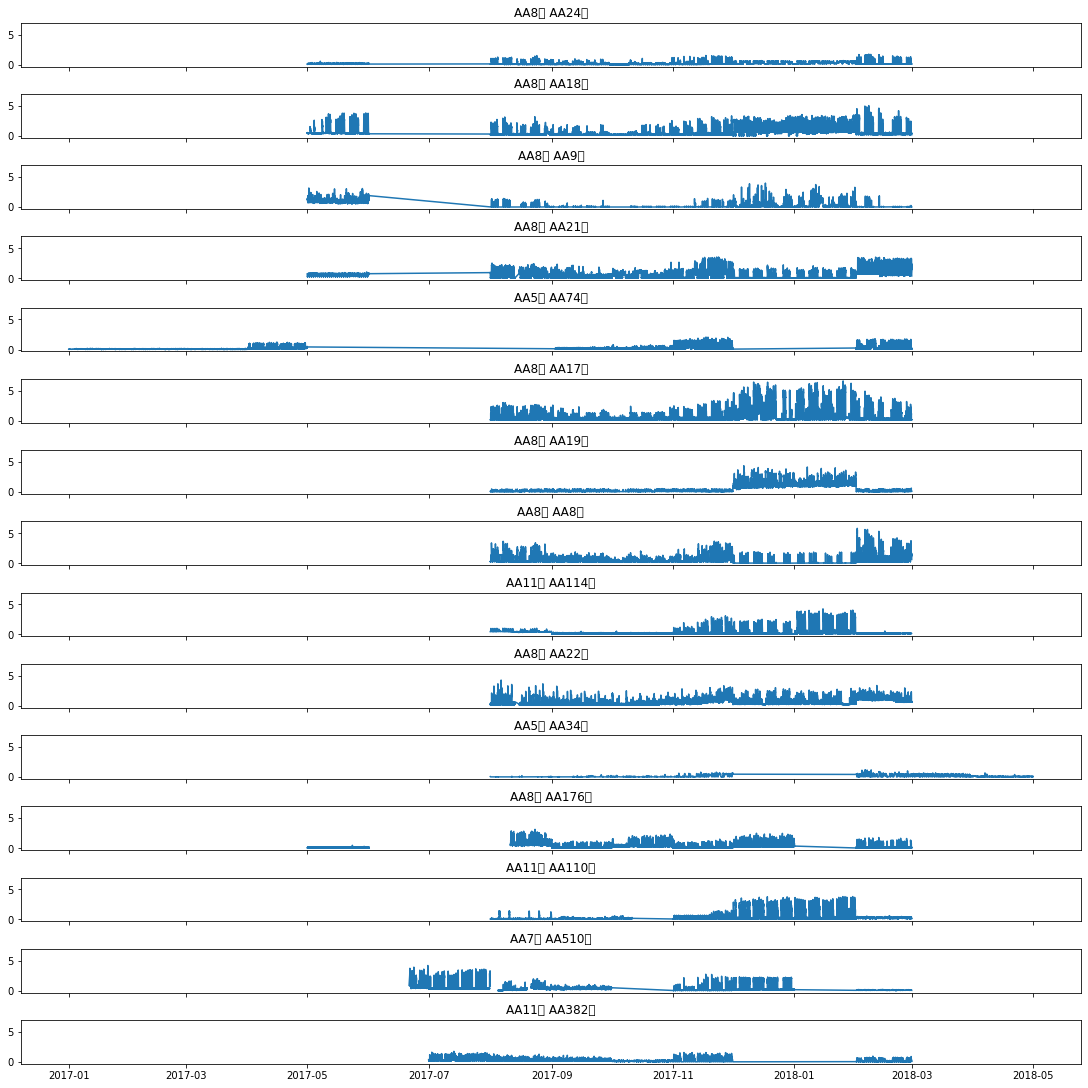

In [71]:
# 일반용(갑)저압 시각화
df_multiple_visualize(df_group_B, 15, 15, 15)

> **`일반용(갑)저압`**인 경우 2017년도 8월 ~ 2018년도 2월 까지 활용 가능할 것으로 판단됨 (아래 10개의 항목 test 용)
 - `AA8동 AA24호`
 - `AA8동 AA18호`
 - `AA8동 AA9호`
 - `AA8동 AA21호`
 - `AA8동 AA17호`
 - `AA8동 AA19호`
 - `AA8동 AA8호`
 - `AA11동 AA114호`
 - `AA8동 AA22호`
 - `AA11동 AA110호`

In [395]:
def df_to_csv(df, df_weather_data, user_list, start_time="2017-1-1", end_time="2019-1-1"):
    '''
    description : Dataframe을 csv로 출력해주는 함수 (user)
    # input parameter 
    df : DataFrame
    df_weather_data : 날씨 DataFrame
    user_list : user 리스트 (1개 이상)
    start_time : 시작 날짜(일 단위), e.g. "2017-1-1" 
    end_time : 종료 날짜(일 단위), e.g. "2019-1-1"
    # Output parameter 
    따로 없으며, csv 파일을 "preprocessed data/"에 출력함 
    
    output column list
    1. 'datetime'     : 15분 단위 시간
    2. 'active_power' : 유효전력 
    3. 'month'        : 월 (1 ~ 12)
    4. 'week'         : 주 (1 ~ 52)
    5. 'weekday'      : 월:0 ~ 일:6
    6. 'day'          : 일
    7. 'hour'         : 시간 (0 ~ 23)
    8. 'is_holiday'   : 휴일:1, 비휴일:0
    9. 
    10. 
    11. 
    12. 
    '''
    contract_type = df['contract_type'].unique()[0]
    
    standard_time = pd.date_range(start_time, end_time, freq="15T")[:-1]  # 15분 단위로 시간 데이터 생성
    df_standard_time = pd.DataFrame(standard_time, columns=['datetime'])  #
    
    # wheatehr_data
    time = pd.date_range("2017-1-1", "2019-1-1", freq="15T")[:-1]
    #df_time = pd.DataFrame(time, columns=['datetime'])
    df_weather_data['datetime'] = time
    
    
    for user in user_list:
        # 불필요한 컬럼 제거하기!
        
        # 1. user별로 df 분할 및 '시간' 및 '유효전력' 컬럼 출력
        temp_df = df[df['user'] == user]
        
        # 2. df merge
        df_time_power = pd.merge(df_standard_time, temp_df, how = 'left')
        df_time_power = pd.merge(df_time_power, df_weather_data, how = 'left')
        # 3. Time으로부터 생성하는 변수 : month, week, weekday, day, hour
        # weekend와 holiday를 이용하여, 휴일을 정의
        # The month as January=1, December=12.
        df_time_power['month'] = df_time_power['datetime'].dt.month
        # The week ordinal of the year.
        df_time_power['week'] = df_time_power['datetime'].dt.week
        # The day of the week with Monday=0, Sunday=6.
        df_time_power['weekday'] = df_time_power['datetime'].dt.weekday
        # The weekend of the day with monday ~ friday = 0, saturday, sunday = 1
        df_time_power['weekend'] = df_time_power['weekday'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1})

        # The day of the 1~31
        df_time_power['day'] = df_time_power['datetime'].dt.day
        # The hour of the 0 ~ 23
        df_time_power['hour'] = df_time_power['datetime'].dt.hour

        # 공휴일(1) 및 평일(0) 구분"
        df_time_power['holiday'] = df_time_power['datetime'].dt.date.isin(holidays).astype(int)
        df_time_power['is_holiday'] = (df_time_power['weekend'] + df_time_power['holiday']).map({0:0, 1:1, 2:1})
        
        
        # 4. 보간법 이후 평균 (반올림 하기!)
        df_time_power = df_time_power.interpolate().round(2)[['datetime', 'active_power', 'month', 'week', 'weekday', 'day', 'hour', 'is_holiday', 'precipitation','temperature', 'wind_speed', 'humidity']]
        
        # 
        fill_mean_func = lambda g: g.fillna(g.mean())
        df_time_power = df_time_power.groupby(['weekday', 'hour', 'is_holiday']).apply(fill_mean_func).round(2).sort_values('datetime')
        
        
        # 4. csv 파일로 추출하기
        df_time_power.to_csv('preprocessed data/' + contract_type + '_' + user +'.csv', index=False)
        print("'{0}.csv' file has been created.".format(user))
    print("finished !")
    return None

In [396]:
df_group_B_user_lists = ['AA8동 AA24호', 'AA8동 AA18호', 'AA8동 AA9호', 'AA8동 AA21호', 'AA8동 AA17호', 'AA8동 AA19호', 'AA8동 AA8호', 'AA11동 AA114호', 'AA8동 AA22호', 'AA11동 AA110호']

In [397]:
df_to_csv(df_group_B, weather_data, df_group_B_user_lists, '2017-8-1', '2018-3-1')

'AA8동 AA24호.csv' file has been created.
'AA8동 AA18호.csv' file has been created.
'AA8동 AA9호.csv' file has been created.
'AA8동 AA21호.csv' file has been created.
'AA8동 AA17호.csv' file has been created.
'AA8동 AA19호.csv' file has been created.
'AA8동 AA8호.csv' file has been created.
'AA11동 AA114호.csv' file has been created.
'AA8동 AA22호.csv' file has been created.
'AA11동 AA110호.csv' file has been created.
finished !


['AA11동 AA47호', 'AA11동 AA77호', 'AA12동 AA49호', 'AA4동 AA84호', 'AA7동 AA767호', 'AA3동 AA68호', 'AA4동 AA45호', 'AA4동 AA4호', 'AA10동 AA150호', 'AA7동 AA734호', 'AA4동 AA120호', 'AA11동 AA146호', 'AA12동 AA45호', 'AA11동 AA72호', 'AA4동 AA79호']


/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


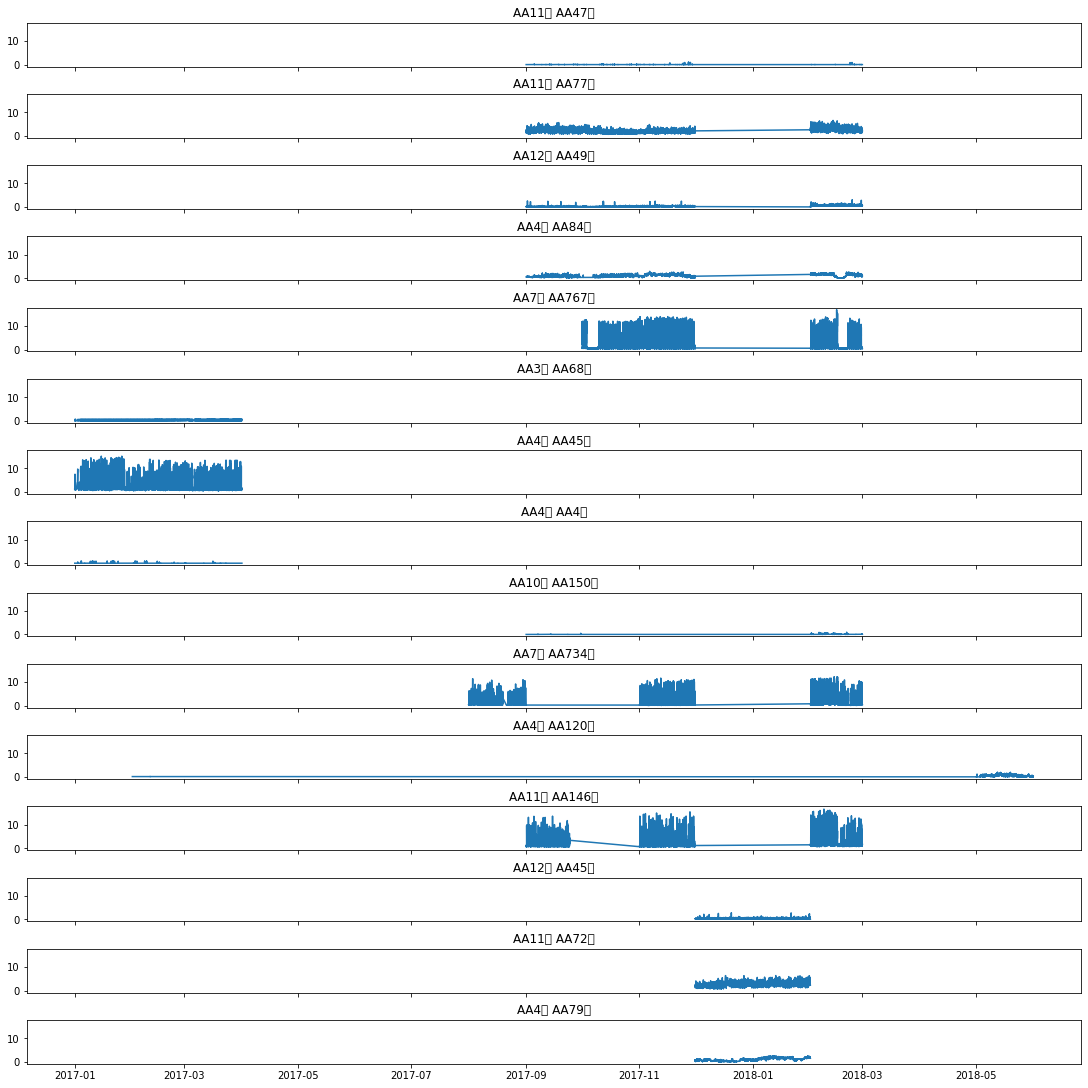

In [72]:
# 산업용(갑)저압 시각화
df_multiple_visualize(df_group_C, 15, 15, 15)

['AA3동 AA93호', 'AA8동 AA57호', 'AA3동 AA92호', 'AA8동 AA95호', 'AA8동 AA56호', 'AA11동 AA55호', 'AA8동 AA96호', 'AA8동 AA196호', 'AA3동 AA91호', 'AA3동 AA89호', 'AA3동 AA95호', 'AA8동 AA92호', 'AA8동 AA600호', 'AA8동 AA94호', 'AA3동 AA97호']


/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


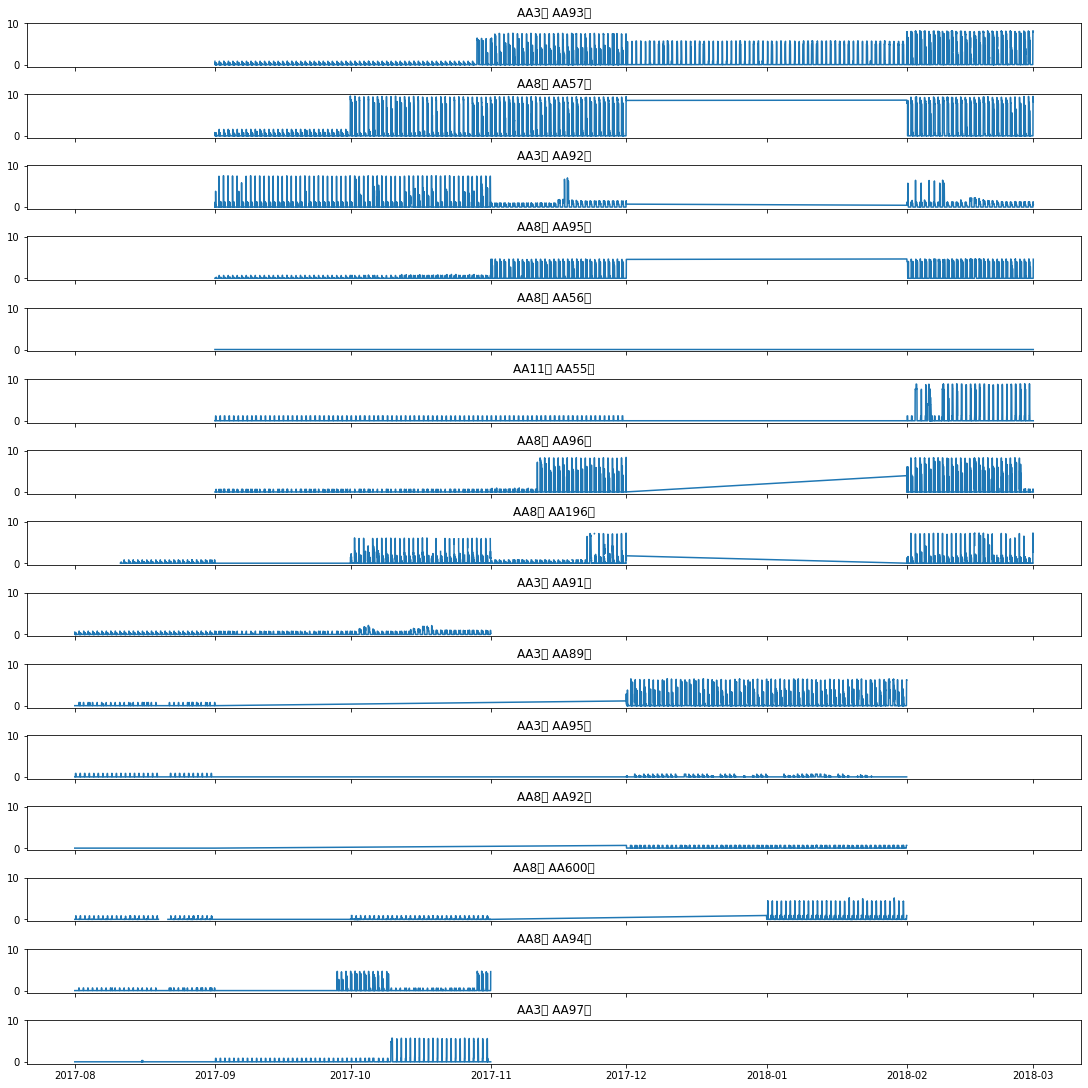

In [73]:
# 심야전력(갑) 시각화
df_multiple_visualize(df_group_D, 15, 15, 15)

['AA13동 AA31호', 'AA8동 AA30호', 'AA8동 AA28호', 'AA3동 AA73호', 'AA10동 AA44호', 'AA48동 AA114호', 'AA60동 AA37호', 'AA112동 AA1787호', 'AA3동 AA696호', 'AA3동 AA34호', 'AA4동 AA49호', 'AA11동 AA152호', 'AA8동 AA844호', 'AA48동 AA995호', 'AA8동 AA845호']


/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


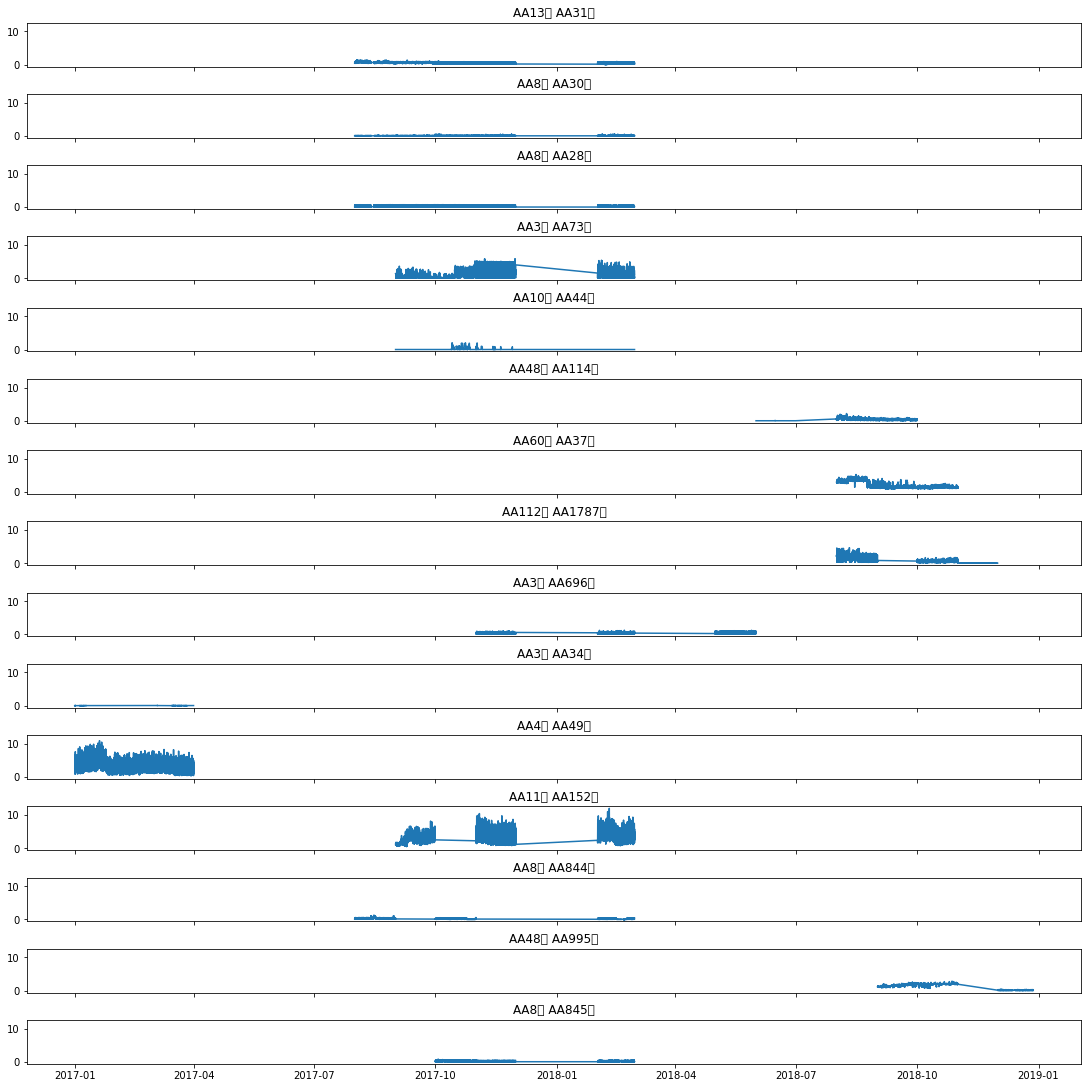

In [74]:
# 농사용(을)저압 시각화
df_multiple_visualize(df_group_E, 15, 15, 15)

['AA7동 AA567호', 'AA7동 AA565호', 'AA6동 AA438호', 'AA25동 AA739호', 'AA24동 AA725호', 'AA104동 AA1267호', 'AA7동 AA555호', 'AA55동 AA948호', 'AA7동 AA549호', 'AA104동 AA1266호', 'AA7동 AA563호', 'AA104동 AA1250호', 'AA24동 AA722호', 'AA97동 AA1244호', 'AA104동 AA1276호']


/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


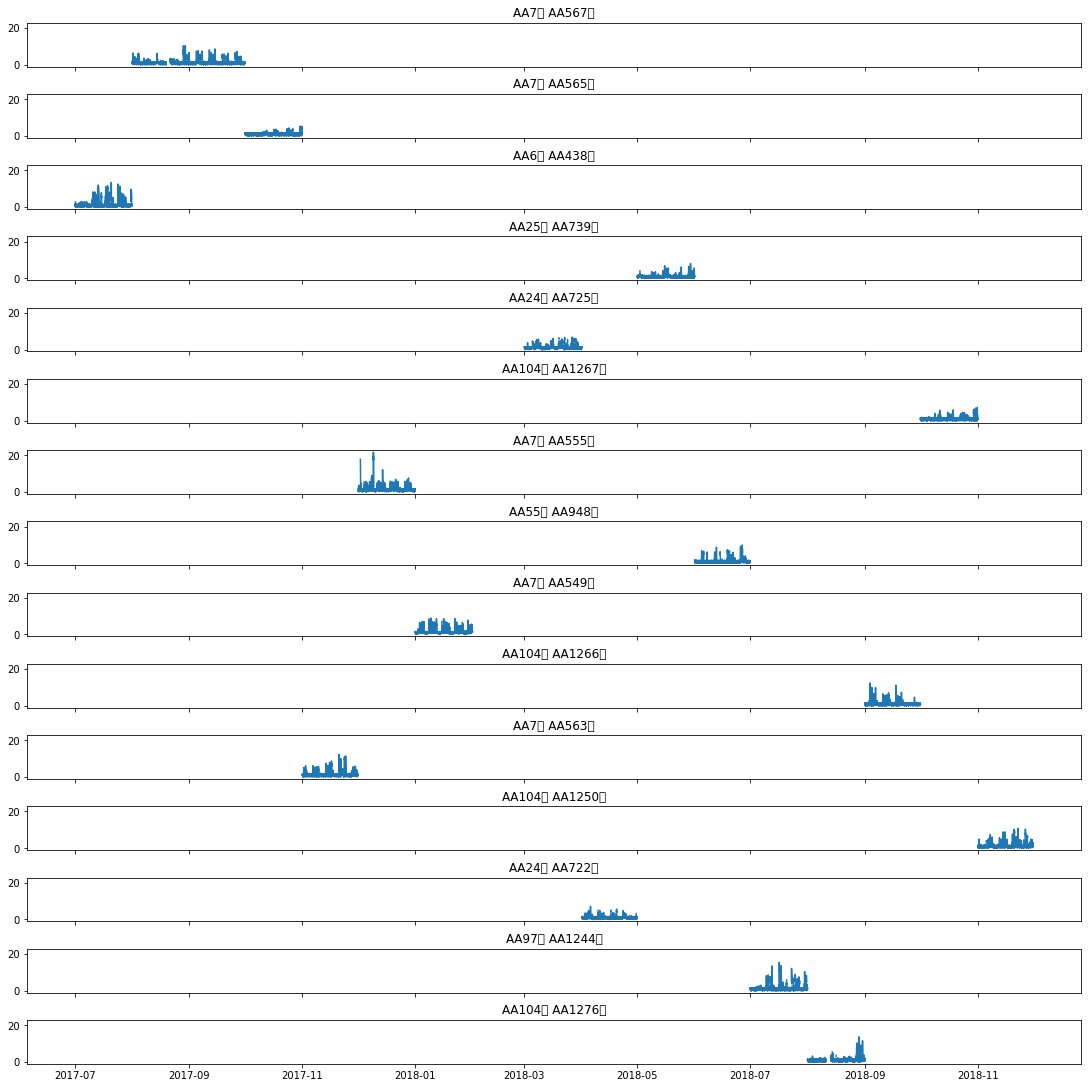

In [75]:
# 교육용(갑)저압 시각화
df_multiple_visualize(df_group_F, 15, 15, 15)

['AA17동 AA1885호', 'AA17동 AA1827호', 'AA68동 AA732호', 'AA68동 AA705호', 'AA17동 AA1895호', 'AA17동 AA1860호', 'AA68동 AA724호', 'AA68동 AA715호', 'AA17동 AA1997호', 'AA94동 AA46호', 'AA12동 AA868호', 'AA12동 AA867호', 'AA17동 AA1880호', 'AA114동 AA1012호', 'AA12동 AA869호']


/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


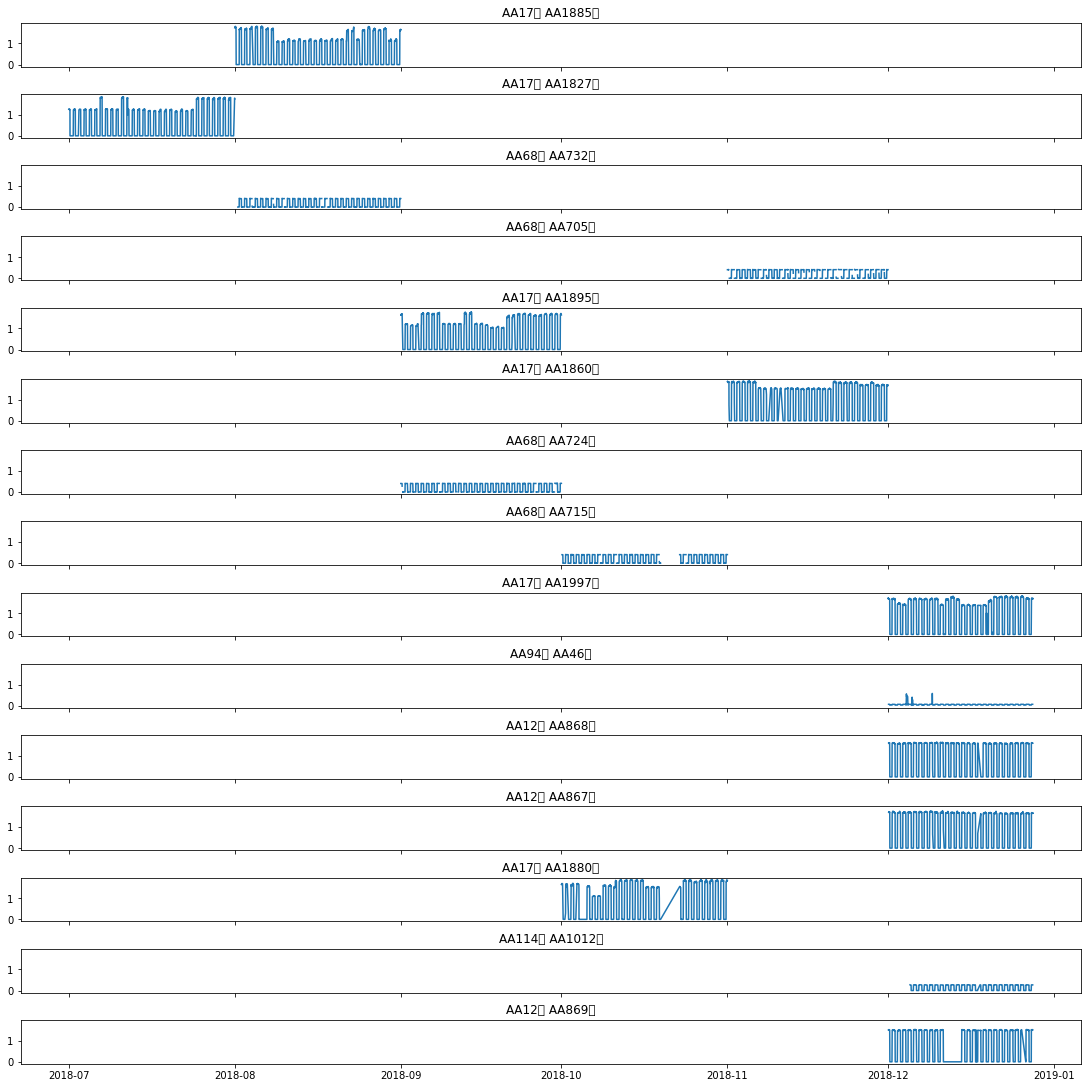

In [76]:
# 가로등(을) 시각화
df_multiple_visualize(df_group_G, 15, 15, 15)

### 날씨 데이터 업로드

In [357]:
# 2017년 ~ 2018년 data 취합

path_list = [r'data/weather_data/NJ']

li = []
for path in path_list:
    all_files = glob.glob(path + "/*.csv")
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=None, encoding='euc-kr', names = ['precipitation','temperature', 'wind_speed', 'humidity'])
        li.append(df)

weather_data = pd.concat(li, axis=0, ignore_index=True).round(2)

In [358]:
weather_data

,precipitation,temperature,wind_speed,humidity
0,0.0,-3.3,0.0,77.0
1,0.0,-3.3,1.4,78.0
2,0.0,-2.5,6.8,77.0
3,0.0,-2.8,5.0,75.0
4,0.0,-3.4,4.3,79.0
5,0.0,-3.2,0.7,76.0
6,0.0,-3.7,0.7,78.0
7,0.0,-4.3,0.0,83.0
8,0.0,-3.6,5.4,79.0
9,0.0,-3.4,9.0,76.0
